<a href="https://colab.research.google.com/github/InnaK342/nn2022/blob/main/Lab4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 4
##Neural Network Classification with TensorFlow
###Завдання
1. На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
2. Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи.
3. Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.
5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab4).


##Імпортування бібліотек

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

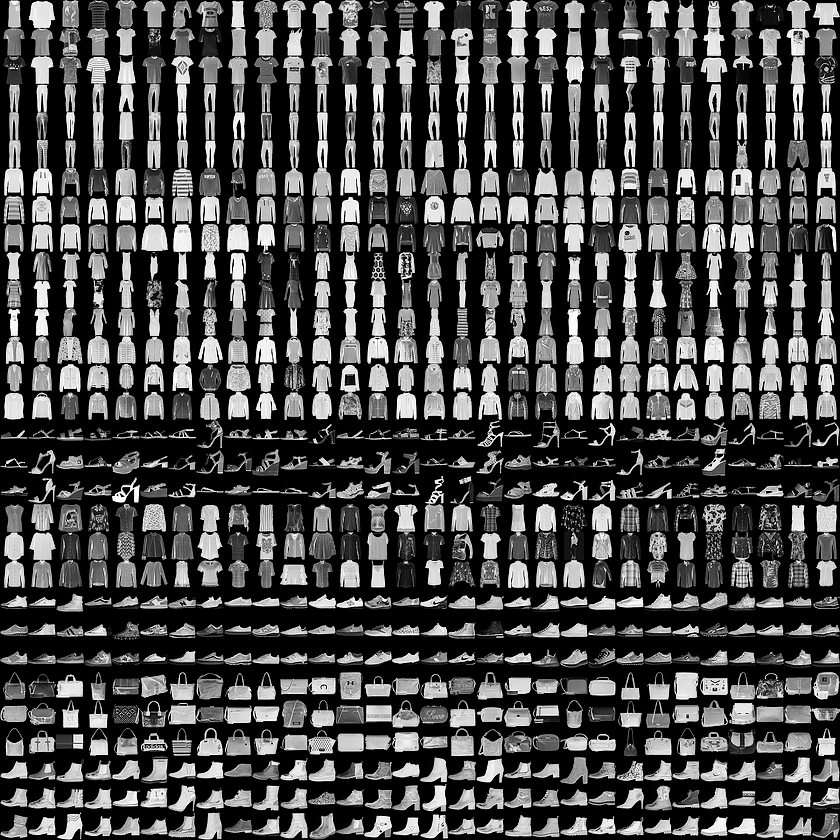

##Вибір трьох класів за варіантом(7, 0, 4)

In [38]:
class_names = ['Sneaker', 'T-shirt/top', 'Coat']

##Створення масивів з тестовими і тренувальними даними

In [14]:
import numpy as np

my_train_images = []
my_train_labels = []
my_test_images = []
my_test_labels = []
for i in range(len(train_labels)):
  if (train_labels[i]==7 or train_labels[i]==0 or train_labels[i]==4 ):
    my_train_images.append(train_images[i])
    my_train_labels.append(train_labels[i])
for i in range(len(test_labels)):
  if (test_labels[i]==7 or test_labels[i]==0 or test_labels[i]==4):
    my_test_images.append(test_images[i])
    my_test_labels.append(test_labels[i])

my_train_images = np.array(my_train_images)
my_train_labels = np.array(my_train_labels)
my_test_images = np.array(my_test_images)
my_test_labels = np.array(my_test_labels)

my_train_images = my_train_images / 255.0
my_test_images = my_test_images / 255.0
print(len(my_train_images))
print(len(my_test_images))

18000
3000


##Вивід перших 100 елементів з тренувального набору

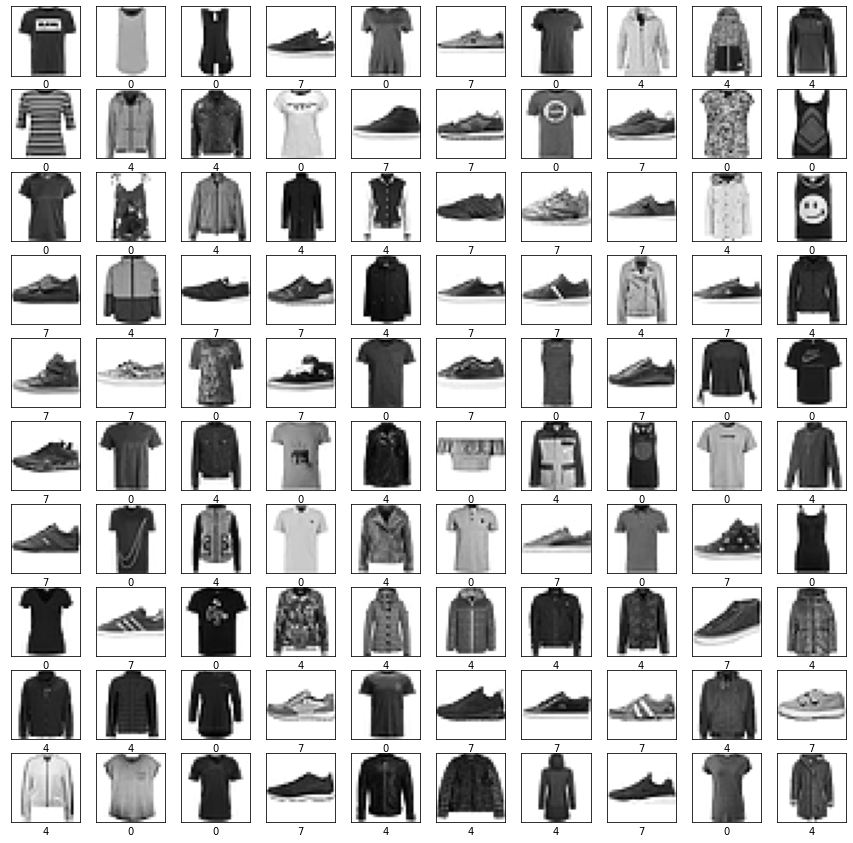

In [15]:
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(my_train_images[i], cmap=plt.cm.binary)
    plt.xlabel(my_train_labels[i])

##Навчання мережі

In [24]:
tf.random.set_seed(42)

# Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model
fit_data = model.fit(my_train_images, my_train_labels, epochs=40)                   


Epoch 1/40
563/563 [==============================] - 2s 2ms/step - loss: 0.0686 - accuracy: 0.9822
Epoch 2/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.9877
Epoch 3/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0332 - accuracy: 0.9896
Epoch 4/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0293 - accuracy: 0.9906
Epoch 5/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0261 - accuracy: 0.9913
Epoch 6/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0261 - accuracy: 0.9918
Epoch 7/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0233 - accuracy: 0.9924
Epoch 8/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0211 - accuracy: 0.9932
Epoch 9/40
563/563 [==============================] - 2s 3ms/step - loss: 0.0208 - accuracy: 0.9937
Epoch 10/40
563/563 [==============================] - 2s 3ms/step - loss: 0.0173 - accuracy: 0.9948

##Вибір оптимального кроку градієнтного алгоритму

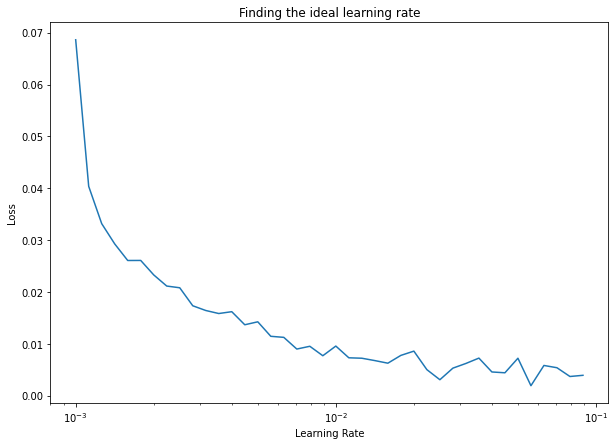

In [26]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, fit_data.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


##Побудова Confusion Matrix

94/94 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9933
Test accuracy: 0.9933333396911621


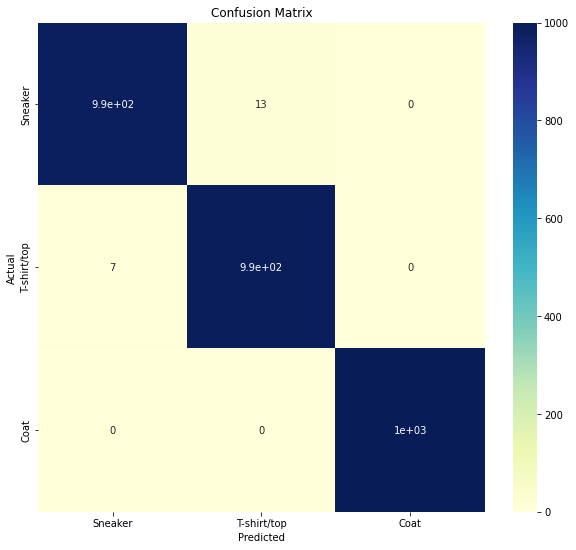

In [43]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

# Оцінка точності
test_loss, test_acc = model.evaluate(my_test_images, my_test_labels)
print('Test accuracy:', test_acc)

# Прогнозування
predictions = model.predict(my_test_images)
y_predictions = []
for i in predictions:
  i_max = np.argmax(i)
  y_predictions = np.append(y_predictions, i_max)


cm = confusion_matrix(my_test_labels, y_predictions)
dataframe_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
plt.figure(figsize=(10,9))
sns.heatmap(dataframe_cm, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()